In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import pickle
import random
data_path = '../results/cluster_files/tinyimagenet200_notliving_trgt_clusters.pkl'
data_path2 = '../results/cluster_files/tinyimagenet200_notliving_src_clusters.pkl'

In [15]:
def get_data(data_file):
    data = pickle.load(open(data_file,'rb'))
    train_data = data['train']
    test_data = data['test']
    return (train_data, test_data)

In [18]:
train_data, test_data =  get_data(data_path)
train_data2, test_data2 =  get_data(data_path2)
#train_data[epochs][class_num][data_samp]
train_data[0][0][0].shape, test_data[0][0][0].shape,train_data2[0][3][0].shape, test_data2[0][3][0].shape

((10, 640), (50, 640), (500, 640), (50, 640))

In [19]:
def stack_data(in_dict):
    class_ids = sorted(in_dict.keys())
    class_idx = {x:ctr for ctr,x in enumerate(class_ids)}
    num_classes = len(class_ids) 

    data = [in_dict[x][0] for x in class_ids]
    labels = []
    for x in class_ids:
        num_samps, num_classes_orig = in_dict[x][1].shape
        label_array = np.zeros((num_samps, num_classes))
        curr_hot = class_idx[x]
        label_array[:,curr_hot] = 1
        labels.append(label_array)

    data = np.vstack(data)
    labels = np.vstack(labels)

    return data, labels

In [20]:
def show_eigenval_plot(S, epoch, pdf):

    fig, ax = plt.subplots(1,1,sharex=True)
    eig_list = list(S)
    ax.plot(eig_list,color = 'steelblue',marker="o")
    ax.set_xlabel('Eigenvectors')
    ax.set_ylabel('Eigenvalues')
    ax.set_title('Eigenvalues ar Epoch: ' + str(epoch))
    pdf.savefig( fig )
    

In [21]:
def plot_eigen_vals(data, outname):
    epochs = sorted(data.keys())
    pdf = matplotlib.backends.backend_pdf.PdfPages(outname)
    out_dict = {}
    for curr_epoch in epochs:
        curr_data, curr_labels = stack_data(data[curr_epoch])
        centered_data = curr_data - np.mean(curr_data)
        U, S, V = np.linalg.svd(centered_data, full_matrices=False)
        components = V
        coefficients = np.dot(U, np.diag(S))
        show_eigenval_plot(S, curr_epoch, pdf)
        out_dict[curr_epoch] = S[0]/S[1]
    pdf.close()
    return out_dict

<ipython-input-20-da215c1d96da>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,sharex=True)


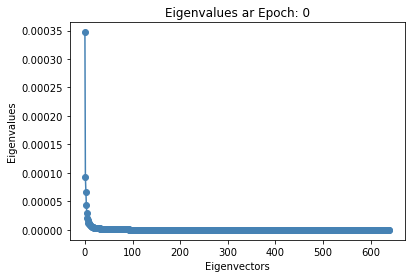

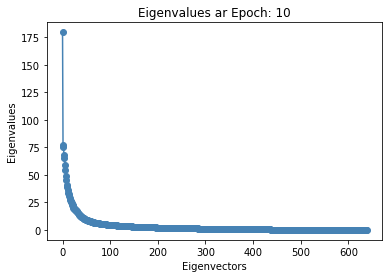

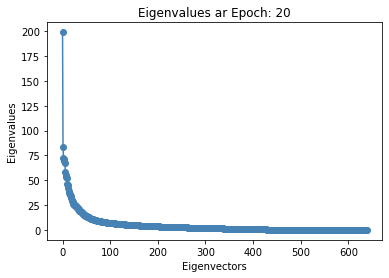

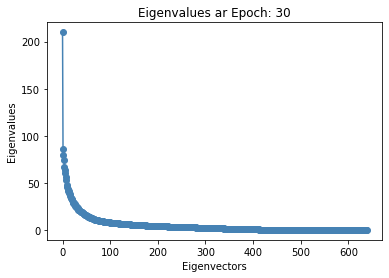

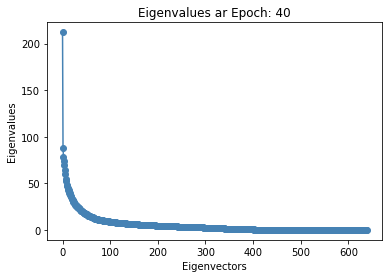

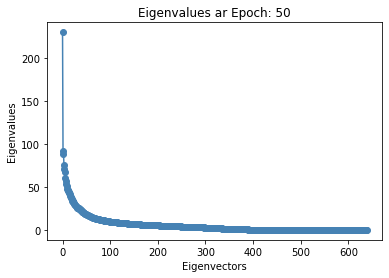

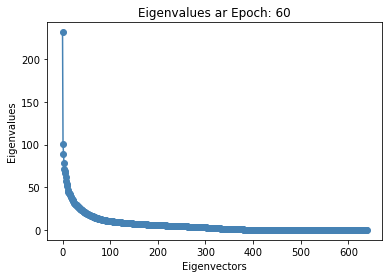

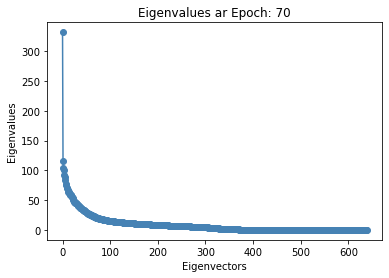

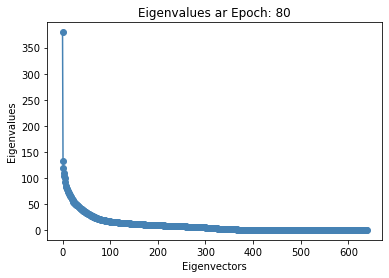

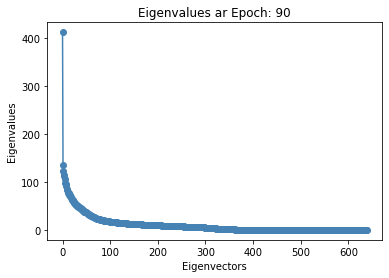

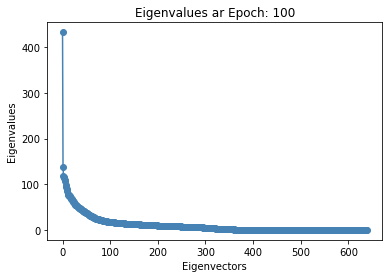

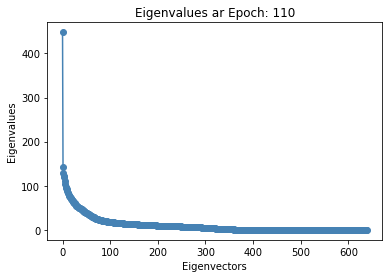

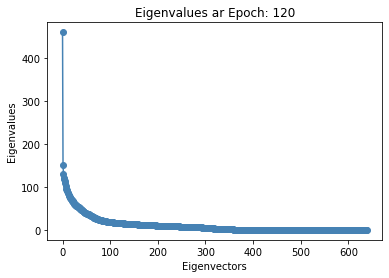

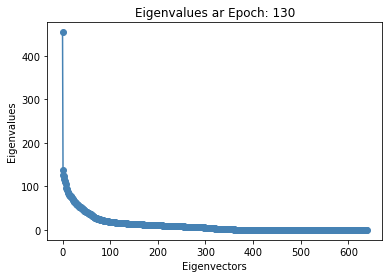

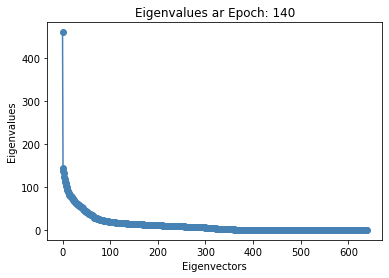

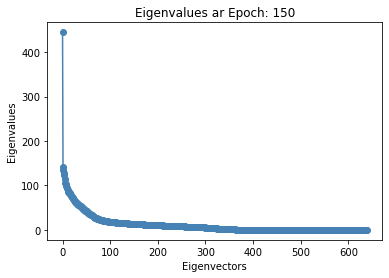

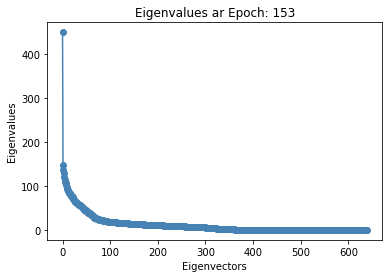

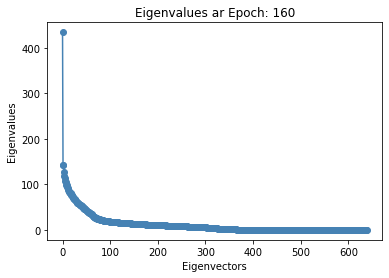

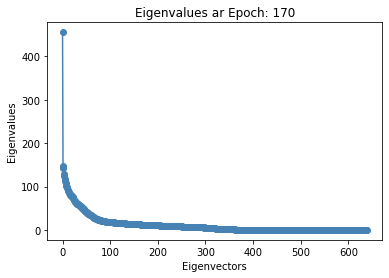

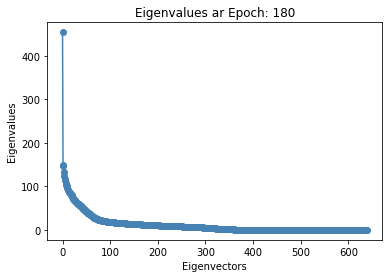

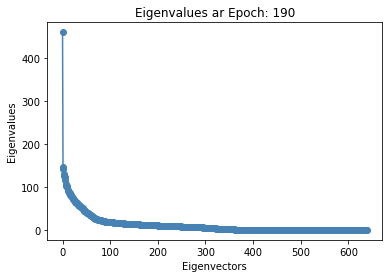

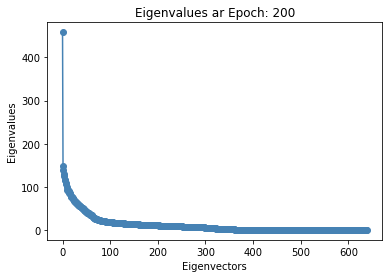

In [22]:
od35 = plot_eigen_vals(test_data,'tfer_task_eigs.pdf')

<ipython-input-20-da215c1d96da>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,sharex=True)


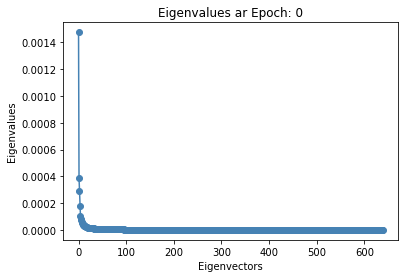

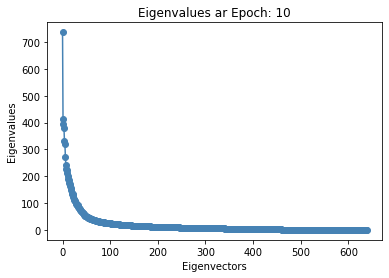

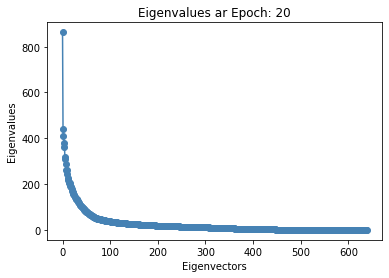

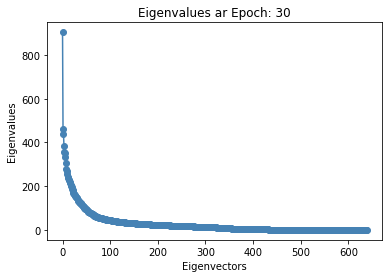

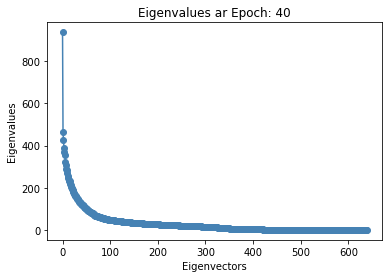

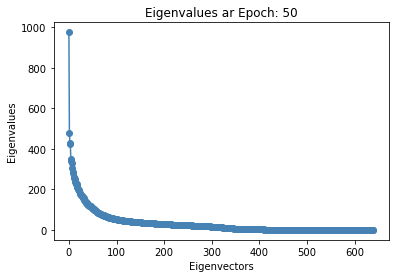

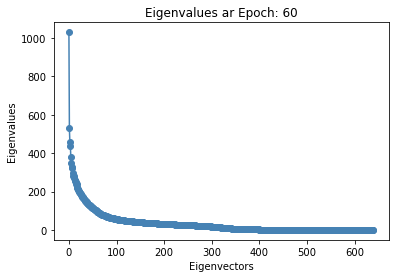

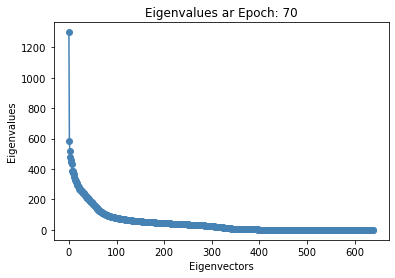

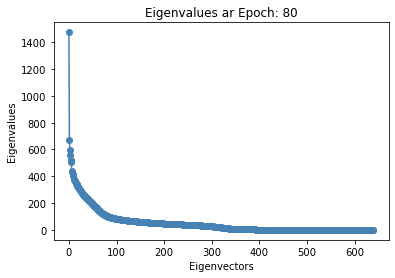

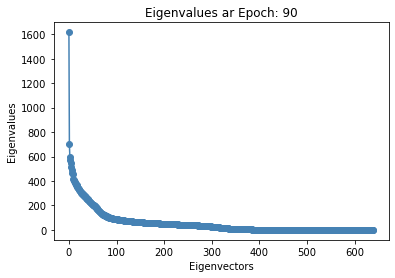

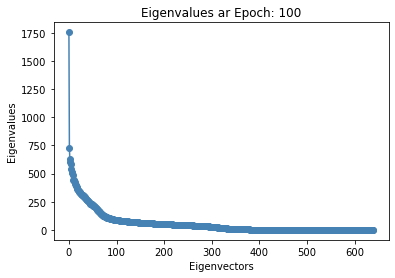

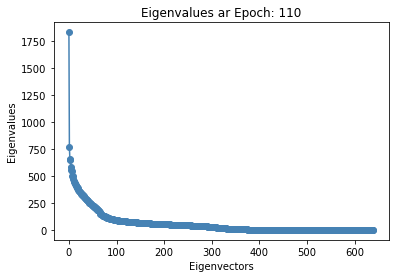

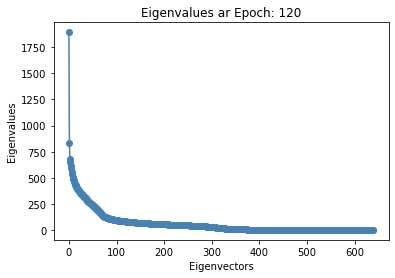

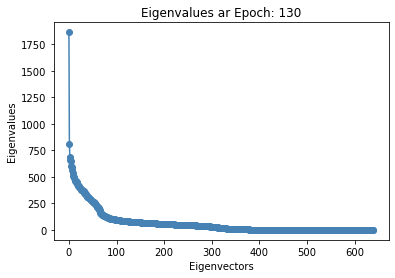

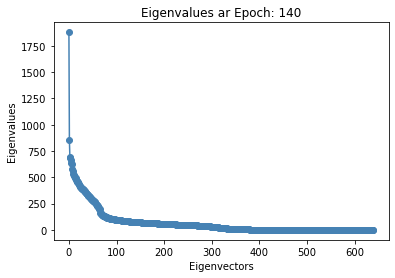

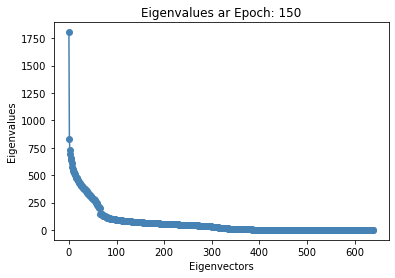

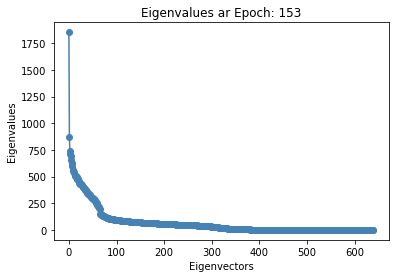

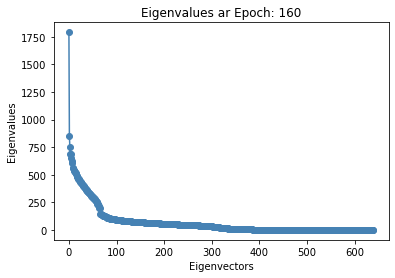

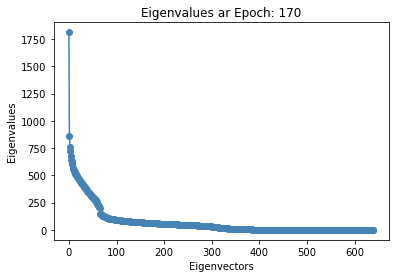

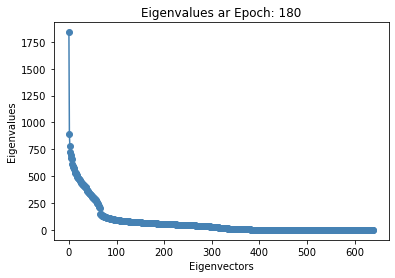

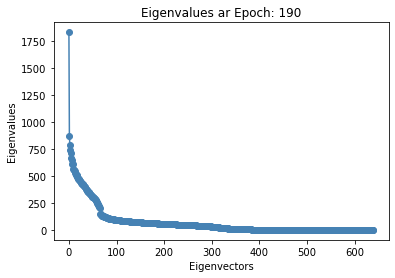

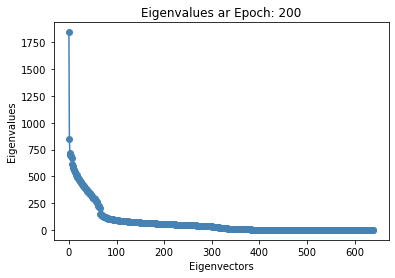

In [23]:
od65 = plot_eigen_vals(train_data2,'src_task_eigs.pdf')

In [24]:
od35

{0: 3.733616,
 10: 2.3248053,
 20: 2.3860013,
 30: 2.4422748,
 40: 2.405909,
 50: 2.4995167,
 60: 2.2886603,
 70: 2.877652,
 80: 2.8766909,
 90: 3.0439875,
 100: 3.1243534,
 110: 3.1580825,
 120: 3.057516,
 130: 3.3053823,
 140: 3.1979802,
 150: 3.1389492,
 153: 3.0570502,
 160: 3.0287716,
 170: 3.071058,
 180: 3.046165,
 190: 3.1267262,
 200: 3.1124215}

In [25]:
od65

{0: 3.7743487,
 10: 1.784452,
 20: 1.9600886,
 30: 1.9615551,
 40: 2.0220058,
 50: 2.0291579,
 60: 1.9489404,
 70: 2.2337625,
 80: 2.202476,
 90: 2.3102002,
 100: 2.422283,
 110: 2.3939407,
 120: 2.2700543,
 130: 2.2922218,
 140: 2.19752,
 150: 2.181881,
 153: 2.1342077,
 160: 2.1057384,
 170: 2.1008897,
 180: 2.0699413,
 190: 2.1117957,
 200: 2.1805625}

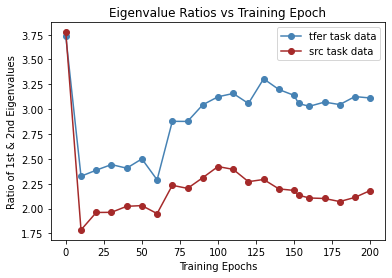

In [26]:
ep = [x for x in sorted(od65.keys())]
eig35 = [od35[x] for x in sorted(od35.keys())]
eig65 = [od65[x] for x in sorted(od65.keys())]
fig, ax = plt.subplots(1,1,sharex=True)
ax.plot(ep,eig35,color = 'steelblue',marker="o",label="tfer task data")
ax.plot(ep,eig65,color = 'brown',marker="o",label="src task data")
ax.set_xlabel('Training Epochs')
ax.set_ylabel('Ratio of 1st & 2nd Eigenvalues')
ax.set_title('Eigenvalue Ratios vs Training Epoch')
ax.legend()
plt.savefig("EigenvalueRatios.pdf")
